<a href="https://colab.research.google.com/github/FabrizioBettetti/Machine-learning/blob/main/Binary_classification_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

np.int64(1)

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()   #<word, index>
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])   #<index, word>
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])   #Index 0, 1, 2 reserved: offset by 3
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
import numpy as np

#Multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
train_labels.shape, test_labels.shape

((25000,), (25000,))

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
y_train.shape, y_test.shape

((25000,), (25000,))

In [11]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
  layers.Dense(16, activation='relu'),   #16, 32, 64
  layers.Dense(16, activation='relu'),   #16, 32, 64
  layers.Dense(1, activation='sigmoid')   #'sigmoid', 'tanh'
])
#Last layer with sigmoid activation: ouput probabilities of positive review (class 1)

In [12]:
#Loss:
#use crossentropy when model outputs probabilities;
#binary classification;
#=> binary crossentropy

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])   #'binary_crossentropy', 'mse'

In [13]:
#Split original trainin set in validation set (first 10k samples) and partial training set (the remaining part)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.6770 - loss: 0.6062 - val_accuracy: 0.8558 - val_loss: 0.3991
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8926 - loss: 0.3328 - val_accuracy: 0.8853 - val_loss: 0.3028
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9270 - loss: 0.2309 - val_accuracy: 0.8900 - val_loss: 0.2821
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9412 - loss: 0.1837 - val_accuracy: 0.8880 - val_loss: 0.2805
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9531 - loss: 0.1552 - val_accuracy: 0.8787 - val_loss: 0.3079
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9569 - loss: 0.1386 - val_accuracy: 0.8869 - val_loss: 0.2902
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9703 - loss: 0.1131 - val_accuracy: 0.8854 - val_loss: 0.2982
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9725 - loss: 0.0969 - val_accuracy: 0.8736 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

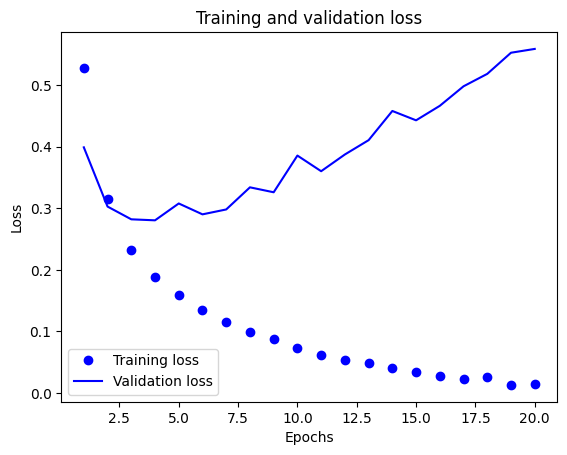

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']   #List of losses: one per epoch
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
np.argmin(val_loss_values) + 1   #Best epoch

np.int64(4)

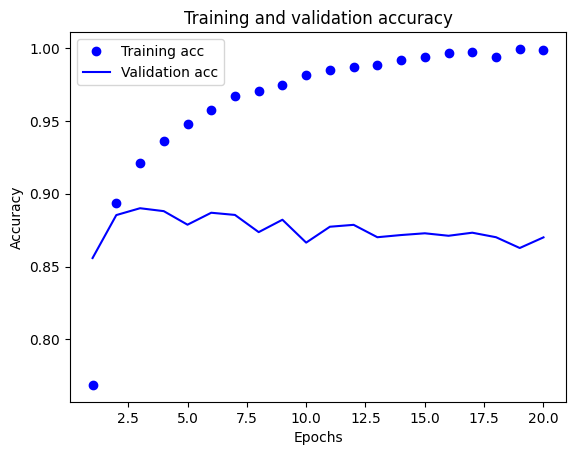

In [18]:
plt.clf()   #Clear figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
np.argmax(val_acc) + 1   #Best epoch

np.int64(3)

Try:
*   1 and 3 hidden layers instead of 2
*   layers with 32 and 64 units
*   mse loss instead of binary crossentropy
*   tanh activation instead of relu





##Model with optimal epochs

In [22]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7469 - loss: 0.5512
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8986 - loss: 0.2846
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9285 - loss: 0.2053
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8883 - loss: 0.2807


[0.2792913615703583, 0.8894000053405762]

In [23]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.2312912 ],
       [0.9998201 ],
       [0.91394323],
       ...,
       [0.12124968],
       [0.10275156],
       [0.64121777]], dtype=float32)